In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Royal Challengers Bangalore')]

Match1 = Bangalore Home Ground

Match2 = Hyderabad Home Ground

# Overall Banaglore vs Hyderabad:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                        team1  \
387   388    2013  Hyderabad  2013-04-07  Royal Challengers Bangalore   
502   503    2014  Hyderabad  2014-05-20  Royal Challengers Bangalore   
524   525    2015  Bangalore  2015-04-13  Royal Challengers Bangalore   
579   580    2016  Bangalore  2016-04-12  Royal Challengers Bangalore   
686  7944    2018  Bengaluru    17/05/18  Royal Challengers Bangalore   

                   team2                  toss_winner toss_decision  result  \
387  Sunrisers Hyderabad  Royal Challengers Bangalore           bat     tie   
502  Sunrisers Hyderabad  Royal Challengers Bangalore           bat  normal   
524  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   
579  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   
686  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   

     dl_applied                       winner  win_by_runs  win_by_wickets  \
387           0          Sunrisers Hyderabad            0               0   
502           0          Sunrisers Hyderabad            0               7   
524           0          Sunrisers Hyderabad            0               8   
579           0  Royal Challengers Bangalore           45               0   
686           0  Royal Challengers Bangalore           14               0   

    player_of_match                                      venue  \
387       GH Vihari  Rajiv Gandhi International Stadium, Uppal   
502       DA Warner  Rajiv Gandhi International Stadium, Uppal   
524       DA Warner                      M Chinnaswamy Stadium   
579  AB de Villiers                      M Chinnaswamy Stadium   
686  AB de Villiers                      M Chinnaswamy Stadium   

             umpire1         umpire2        umpire3  
387     AK Chaudhary          S Ravi            NaN  
502     AK Chaudhary        NJ Llong            NaN  
524     RM Deshpande  RK Illingworth            NaN  
579  HDPK Dharmasena       VK Sharma            NaN  
686           S Ravi   Anil Dandekar  C Shamshuddin

Matches played between Bangalore and Hyderabad.

In [6]:
match.shape

(14, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad            8
Royal Challengers Bangalore    6
Name: winner, dtype: int64

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

**Hyderabad won 8 times and Bangalore won 6 times against each other.**

In [9]:
match['toss_winner'].value_counts()

Royal Challengers Bangalore    8
Sunrisers Hyderabad            6
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    9
bat      5
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Sunrisers Hyderabad            2
Royal Challengers Bangalore    2
Name: winner, dtype: int64

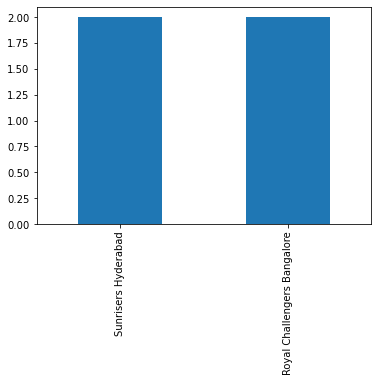

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Both won the toss and won the match 2 times. So winning toss doesn't have much affect to winning the match.**

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Bangalore.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many runs will be scored totally in the match:

In [15]:
total_run = delivery['total_runs'].sum()
total_run

4828

Total 4828 runs made in Hyderabad vs Bangalore match till now.

In [16]:
total_run_Hyderabad = delivery[delivery['batting_team'] == 'Sunrisers Hyderabad']['total_runs'].sum()
total_run_Hyderabad

2501

Hyderabad scored total 2501 runs against Bangalore till now.

In [17]:
total_run_Bangalore = delivery[delivery['batting_team'] != 'Sunrisers Hyderabad']['total_runs'].sum()
total_run_Bangalore

2327

Bangalore scored total 2327 runs against Hyderabad till now.

In [18]:
avg_run_per_match = math.ceil(total_run/len(ids))
avg_run_per_match

345

345 runs in an average made in a match between Hyderabad and Bangalore.

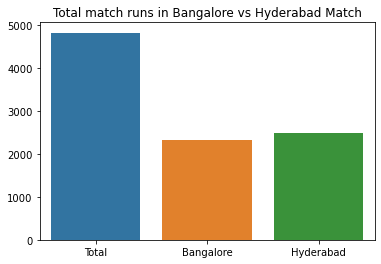

In [19]:
total_match_runs = pd.Series([total_run,total_run_Bangalore,total_run_Hyderabad],index = ['Total','Bangalore','Hyderabad'])
sns.barplot(x=total_match_runs.index,y=total_match_runs)
plt.title('Total match runs in Bangalore vs Hyderabad Match')
plt.show()

**Hyderabad scored more runs against Bangalore.**

In [20]:
total_run_Hyderabad_batting_first = delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'].sum()
total_run_Hyderabad_batting_first

1627

Hyderabad scored total 1627 runs against Bangalore while batting first.

In [21]:
total_matches_batting_first_Hyderabad = len(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Hyderabad

9

Total 9 matches played by Hyderabad while batting first.

In [22]:
avg_run_Hyderabad_batting_first = math.ceil(total_run_Hyderabad_batting_first/total_matches_batting_first_Hyderabad)
avg_run_Hyderabad_batting_first

181

Hyderabad scored 181 in as average against Delhi while batting first.

In [23]:
total_run_Hyderabad_batting_second = delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'].sum()
total_run_Hyderabad_batting_second

854

Hyderabad scored total 854 runs against Delhi while batting second.

In [24]:
total_matches_batting_second_Hyderabad = len(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Hyderabad

5

Total 5 matches played by Hyderabad while batting second.

In [25]:
avg_run_Hyderabad_batting_second = math.ceil(total_run_Hyderabad_batting_second/total_matches_batting_second_Hyderabad)
avg_run_Hyderabad_batting_second

171

Hyderabad scored 171 in as average against Delhi while batting second.

In [26]:
total_run_Bangalore_batting_first = delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'].sum()
total_run_Bangalore_batting_first

905

Bangalore scored total 905 runs against Hyderabad while batting first.

In [27]:
total_matches_batting_first_Bangalore = len(delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Bangalore

5

Total 5 matches played by Bangalore while batting first.

In [28]:
avg_run_Bangalore_batting_first = math.ceil(total_run_Bangalore_batting_first/total_matches_batting_first_Bangalore)
avg_run_Bangalore_batting_first

181

Bangalore scored 181 runs in an average against Hyderabad while batting first.

In [29]:
total_run_Bangalore_batting_second = delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'].sum()
total_run_Bangalore_batting_second

1407

Bangalore scored total 1407 runs against Hyderabad while batting second.

In [30]:
total_matches_batting_second_Bangalore = len(delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Bangalore

9

Total 9 matches played by Bangalore while batting second.

In [31]:
avg_run_Bangalore_batting_second = math.ceil(total_run_Bangalore_batting_second/total_matches_batting_second_Bangalore)
avg_run_Bangalore_batting_second

157

Bangalore scored 157 runs in an average against Hyderabad while batting second.

In [32]:
total_runs_Hyderabad_batting_first_Bangalore_batting_second = avg_run_Hyderabad_batting_first+avg_run_Bangalore_batting_second
total_runs_Hyderabad_batting_first_Bangalore_batting_second

338

In [33]:
total_runs_Bangalore_batting_first_Hyderabad_batting_second = avg_run_Bangalore_batting_first+avg_run_Hyderabad_batting_second
total_runs_Bangalore_batting_first_Hyderabad_batting_second

352

In [34]:
average_match_runs = pd.Series([avg_run_per_match,total_runs_Hyderabad_batting_first_Bangalore_batting_second,total_runs_Bangalore_batting_first_Hyderabad_batting_second],index = ['Total','Hyderabad Batting First','Bangalore Batting First'])
sns.barplot(x=average_match_runs.index,y=average_match_runs)
plt.title('Total match runs in Hyderabad vs Bangalore Match')
plt.show()

**So when Bangalore bat first the total score is higher than when Hyderabad bat first.**

## How many balls more/less will RCB take to reach a score total of 30 runs from after they reach a team total of 50 as compared to SRH:

In [35]:
ball_taken_Hyderabad_batting_first_score_80 = []
ball_taken_Bangalore_batting_second_score_80 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 80:
            break
    if total_runs_Hyderabad >= 80:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_first_score_80.append(total_balls_Hyderabad)
    runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Bangalore = 0
    run_list_Bangalore = []
    wide_Bangalore = 0
    noball_Bangalore = 0
    total_balls_Bangalore = 0
    for i in range(0,len(runs_Bangalore)):
        total_runs_Bangalore += runs_Bangalore[i]
        run_list_Bangalore.append(runs_Bangalore[i])
        if wide_runs_Bangalore[i] > 0:
            wide_Bangalore += 1
        elif noball_runs_Bangalore[i] > 0:
            noball_Bangalore += 1
        if total_runs_Bangalore >= 80:
            break
    if total_runs_Bangalore >= 80:
        total_balls_Bangalore = len(run_list_Bangalore) - wide_Bangalore - noball_Bangalore
    if total_balls_Bangalore > 0:
        ball_taken_Bangalore_batting_second_score_80.append(total_balls_Bangalore)
print(ball_taken_Bangalore_batting_second_score_80)
print(ball_taken_Hyderabad_batting_first_score_80)

[53, 64, 79, 35, 57, 49, 61, 79, 59]
[52, 78, 64, 40, 58, 51, 71, 51, 65]


These balls are taken by Bangalore and Hyderabad to score 80 runs while Hyderabad batting first.

In [37]:
ball_taken_Hyderabad_batting_first_score_50 = []
ball_taken_Bangalore_batting_second_score_50 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 50:
            break
    if total_runs_Hyderabad >= 50:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_first_score_50.append(total_balls_Hyderabad)
    runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Bangalore = 0
    run_list_Bangalore = []
    wide_Bangalore = 0
    noball_Bangalore = 0
    total_balls_Bangalore = 0
    for i in range(0,len(runs_Bangalore)):
        total_runs_Bangalore += runs_Bangalore[i]
        run_list_Bangalore.append(runs_Bangalore[i])
        if wide_runs_Bangalore[i] > 0:
            wide_Bangalore += 1
        elif noball_runs_Bangalore[i] > 0:
            noball_Bangalore += 1
        if total_runs_Bangalore >= 50:
            break
    if total_runs_Bangalore >= 50:
        total_balls_Bangalore = len(run_list_Bangalore) - wide_Bangalore - noball_Bangalore
    if total_balls_Bangalore > 0:
        ball_taken_Bangalore_batting_second_score_50.append(total_balls_Bangalore)
print(ball_taken_Bangalore_batting_second_score_50)
print(ball_taken_Hyderabad_batting_first_score_50)

[32, 48, 52, 22, 40, 28, 31, 61, 32]
[32, 46, 39, 30, 37, 32, 48, 29, 30]


These balls are taken by Bangalore and Hyderabad to score 50 runs while Hyderabad batting first.

In [38]:
ball_taken_Hyderabad_batting_first = pd.Series(ball_taken_Hyderabad_batting_first_score_80) - pd.Series(ball_taken_Hyderabad_batting_first_score_50)
ball_taken_Bangalore_batting_second = pd.Series(ball_taken_Bangalore_batting_second_score_80) - pd.Series(ball_taken_Bangalore_batting_second_score_50)
print(list(ball_taken_Hyderabad_batting_first))
print(list(ball_taken_Bangalore_batting_second))
avg_balls_Hyderabad_batting_first = np.mean(np.abs(pd.Series(ball_taken_Hyderabad_batting_first) - pd.Series(ball_taken_Bangalore_batting_second)))
avg_balls_Hyderabad_batting_first

[20, 32, 25, 10, 21, 19, 23, 22, 35]
[21, 16, 27, 13, 17, 21, 30, 18, 27]


5.222222222222222

**So Bangalore took 5 balls more/less to reach a score total of 30 runs from after they reach a team total of 50 as compared to Hyderabad.**

In [39]:
ball_taken_Hyderabad_batting_second_score_80 = []
ball_taken_Bangalore_batting_first_score_80 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 80:
            break
    if total_runs_Hyderabad >= 80:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_second_score_80.append(total_balls_Hyderabad)
    runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Bangalore = 0
    run_list_Bangalore = []
    wide_Bangalore = 0
    noball_Bangalore = 0
    total_balls_Bangalore = 0
    for i in range(0,len(runs_Bangalore)):
        total_runs_Bangalore += runs_Bangalore[i]
        run_list_Bangalore.append(runs_Bangalore[i])
        if wide_runs_Bangalore[i] > 0:
            wide_Bangalore += 1
        elif noball_runs_Bangalore[i] > 0:
            noball_Bangalore += 1
        if total_runs_Bangalore >= 80:
            break
    if total_runs_Bangalore >= 80:
        total_balls_Bangalore = len(run_list_Bangalore) - wide_Bangalore - noball_Bangalore
    if total_balls_Bangalore > 0:
        ball_taken_Bangalore_batting_first_score_80.append(total_balls_Bangalore)
print(ball_taken_Bangalore_batting_first_score_80)
print(ball_taken_Hyderabad_batting_second_score_80)

[80, 73, 65, 57, 59]
[81, 65, 44, 48, 56]


These balls are taken by Bangalore and Hyderabad to score 80 runs while Bangalore batting first.

In [40]:
ball_taken_Hyderabad_batting_second_score_50 = []
ball_taken_Bangalore_batting_first_score_50 = []
for j in ids:
    runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs_Hyderabad = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['noball_runs'])
    total_runs_Hyderabad = 0
    run_list_Hyderabad = []
    wide_Hyderabad = 0
    noball_Hyderabad = 0
    total_balls_Hyderabad = 0
    for i in range(0,len(runs_Hyderabad)):
        total_runs_Hyderabad += runs_Hyderabad[i]
        run_list_Hyderabad.append(runs_Hyderabad[i])
        if wide_runs_Hyderabad[i] > 0:
            wide_Hyderabad += 1
        elif noball_runs_Hyderabad[i] > 0:
            noball_Hyderabad += 1
        if total_runs_Hyderabad >= 50:
            break
    if total_runs_Hyderabad >= 50:
        total_balls_Hyderabad = len(run_list_Hyderabad) - wide_Hyderabad - noball_Hyderabad
    if total_balls_Hyderabad > 0:
        ball_taken_Hyderabad_batting_second_score_50.append(total_balls_Hyderabad)
    runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs_Bangalore = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['noball_runs'])
    total_runs_Bangalore = 0
    run_list_Bangalore = []
    wide_Bangalore = 0
    noball_Bangalore = 0
    total_balls_Bangalore = 0
    for i in range(0,len(runs_Bangalore)):
        total_runs_Bangalore += runs_Bangalore[i]
        run_list_Bangalore.append(runs_Bangalore[i])
        if wide_runs_Bangalore[i] > 0:
            wide_Bangalore += 1
        elif noball_runs_Bangalore[i] > 0:
            noball_Bangalore += 1
        if total_runs_Bangalore >= 50:
            break
    if total_runs_Bangalore >= 50:
        total_balls_Bangalore = len(run_list_Bangalore) - wide_Bangalore - noball_Bangalore
    if total_balls_Bangalore > 0:
        ball_taken_Bangalore_batting_first_score_50.append(total_balls_Bangalore)
print(ball_taken_Bangalore_batting_first_score_50)
print(ball_taken_Hyderabad_batting_second_score_50)

[56, 62, 36, 37, 39]
[51, 32, 26, 33, 33]


These balls are taken by Bangalore and Hyderabad to score 50 runs while Bangalore batting first.

In [41]:
ball_taken_Hyderabad_batting_second = pd.Series(ball_taken_Hyderabad_batting_second_score_80) - pd.Series(ball_taken_Hyderabad_batting_second_score_50)
ball_taken_Bangalore_batting_first = pd.Series(ball_taken_Bangalore_batting_first_score_80) - pd.Series(ball_taken_Bangalore_batting_first_score_50)
print(list(ball_taken_Hyderabad_batting_second))
print(list(ball_taken_Bangalore_batting_first))
avg_balls_Bangalore_batting_first = np.mean(np.abs(pd.Series(ball_taken_Hyderabad_batting_second) - pd.Series(ball_taken_Bangalore_batting_first)))
avg_balls_Bangalore_batting_first

[30, 33, 18, 15, 23]
[24, 11, 29, 20, 20]


9.4

**So Bangalore took 9 balls more/less to reach a score total of 30 runs from after they reach a team total of 50 as compared to Hyderabad.**

In [42]:
average_balls = pd.Series([avg_balls_Hyderabad_batting_first,avg_balls_Bangalore_batting_first],index = ['Hyderabad Batting First','Bangalore Batting First'])
sns.barplot(x = average_balls.index, y = average_balls)
plt.title('balls more/less taken to reach a score total of 30 runs from after they reach a team total of 50 in Hyderabad vs Bangalore match')
plt.show()

**So when Bangalore batted in first inning, the difference is higher than when Hyderabad batted in first inning.**

## How many wickets more/less will SRH lose as compared to RCB in powerplay:

In [43]:
total_wickets_Bangalore = []
total_wickets_Hyderabad = []
for i in ids:
    wickets_Bangalore = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] <= 6)]['player_dismissed'].count()
    wickets_Hyderabad = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] != 'Royal Challengers Bangalore') & (delivery['over'] <= 6)]['player_dismissed'].count()
    total_wickets_Bangalore.append(wickets_Bangalore)
    total_wickets_Hyderabad.append(wickets_Hyderabad)
print(total_wickets_Bangalore)
print(total_wickets_Hyderabad)
wickets = np.mean(np.abs(pd.Series(total_wickets_Hyderabad) - pd.Series(total_wickets_Bangalore)))
wickets

[2, 2, 1, 1, 2, 1, 1, 2, 4, 1, 0, 1, 3, 3]
[2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1]


0.9285714285714286

Hyderabad lost ~1 wicket more/less as compared to Bangalore in powerplay.

In [44]:
total_wickets_Bangalore_batting_first = []
total_wickets_Hyderabad_batting_second = []
total_ids = list(delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 1)]['match_id'].unique())
for i in total_ids:
    wickets_Bangalore = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] <= 6) & (delivery['inning'] ==1)]['player_dismissed'].count()
    wickets_Hyderabad = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] != 'Royal Challengers Bangalore') & (delivery['over'] <= 6) & (delivery['inning'] ==2)]['player_dismissed'].count()
    total_wickets_Bangalore_batting_first.append(wickets_Bangalore)
    total_wickets_Hyderabad_batting_second.append(wickets_Hyderabad)
print(total_wickets_Bangalore_batting_first)
print(total_wickets_Hyderabad_batting_second)
wickets_Bangalore_batting_first = np.mean(np.abs(pd.Series(total_wickets_Hyderabad_batting_second) - pd.Series(total_wickets_Bangalore_batting_first)))
wickets_Bangalore_batting_first

[2, 2, 1, 1, 2]
[2, 0, 0, 1, 1]


0.8

Hyderabad lost ~1 wicket more/less as compared to Bangalore in powerplay while Bangalore batted in first inning and Hyderabad batted in second inning..

In [45]:
total_wickets_Bangalore_batting_second = []
total_wickets_Hyderabad_batting_first = []
total_ids = list(delivery[(delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['inning'] == 2)]['match_id'].unique())
for i in total_ids:
    wickets_Bangalore = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] == 'Royal Challengers Bangalore') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['player_dismissed'].count()
    wickets_Hyderabad = delivery[(delivery['match_id'] == i) & (delivery['batting_team'] != 'Royal Challengers Bangalore') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['player_dismissed'].count()
    total_wickets_Bangalore_batting_second.append(wickets_Bangalore)
    total_wickets_Hyderabad_batting_first.append(wickets_Hyderabad)
print(total_wickets_Bangalore_batting_second)
print(total_wickets_Hyderabad_batting_first)
wickets_Bangalore_batting_second = np.mean(np.abs(pd.Series(total_wickets_Hyderabad_batting_first) - pd.Series(total_wickets_Bangalore_batting_second)))
wickets_Bangalore_batting_second

[1, 1, 2, 4, 1, 0, 1, 3, 3]
[1, 1, 2, 1, 1, 0, 2, 0, 1]


1.0

Hyderabad lost ~1 wicket more/less as compared to Bangalore in powerplay while Bangalore batted in second inning and Hyderabad batted in first inning..

In [46]:
average_wickets = pd.Series([wickets,wickets_Bangalore_batting_first,wickets_Bangalore_batting_second],index = ['Total','Bangalore Batting First','Hyderabad Batting First'])
sns.barplot(x = average_wickets.index , y = average_wickets)
plt.title('SRH lose more/less wickets as compared to RCB in powerplay')
plt.show()

**So more/less 1 wicket lost by Hyderabad as compared to Bangalore in powerplay.**

In [47]:
total_wickets_Bangalore_overall = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] <= 6)]['player_dismissed'].count()
total_wickets_Bangalore_overall

268

Bangalore lost 268 wickets in powerplay in overall IPL.

In [48]:
total_ids_Bangalore = list(df1[df1['batting_team'] == 'Royal Challengers Bangalore']['match_id'].unique())
avg_wickets_Bangalore_overall = (total_wickets_Bangalore_overall/len(total_ids_Bangalore))
avg_wickets_Bangalore_overall

1.488888888888889

Bangalore lost 1 wicket in an avearge per match in powerplay in overall IPL till now.

In [49]:
total_wickets_Hyderabad_overall = df1[(df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['over'] <= 6)]['player_dismissed'].count()
total_wickets_Hyderabad_overall

131

Hyderabad lost 131 wickets in powerplay in overall IPL.

In [50]:
total_ids_Hyderabad = list(df1[df1['batting_team'] == 'Sunrisers Hyderabad']['match_id'].unique())
avg_wickets_Hyderabad_overall = (total_wickets_Hyderabad_overall/len(total_ids_Hyderabad))
avg_wickets_Hyderabad_overall

1.212962962962963

Hyderabad lost 1 wicket in an avearge per match in powerplay in overall IPL till now.

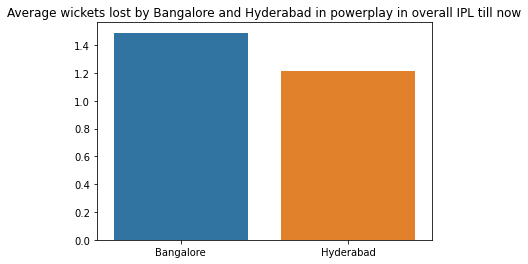

In [51]:
average_wickets_overall = pd.Series([avg_wickets_Bangalore_overall,avg_wickets_Hyderabad_overall],index = ['Bangalore','Hyderabad'])
sns.barplot(x = average_wickets_overall.index , y = average_wickets_overall)
plt.title('Average wickets lost by Bangalore and Hyderabad in powerplay in overall IPL till now')
plt.show()

**So more/less 1 wicket lost by Hyderabad and Bangalore in powerplay in overall IPL.**

## How many dot balls will be bowled in entire match:

In [52]:
dot_ball_list = []
ids1 = ids.copy()
ids1.remove(568)
for j in ids1:
    total_runs = list(delivery[delivery['match_id'] == j]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list.append(dot_balls)
print(dot_ball_list)

[87, 86, 80, 82, 67, 70, 81, 104, 66, 72, 85, 86, 77]


These are dot balls bowled in a match between Bangalore and Hyderabad. I removed the match with id 568 because in that match total 40 overs were not bowled due to some reasons.

In [53]:
avg_dot_balls = np.mean(dot_ball_list)
avg_dot_balls

80.23076923076923

80 dot balls in an average have been bowled in a match between Bangalore and Hyderabad.

In [54]:
dot_ball_list_Bangalore = []
for j in ids1:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Royal Challengers Bangalore')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Bangalore.append(dot_balls)
print(dot_ball_list_Bangalore)

[37, 43, 29, 47, 34, 26, 39, 46, 36, 36, 42, 24, 43]


These are dot balls bowled by Bangalore in a match between Bangalore and Hyderabad.

In [55]:
avg_dot_balls_Bangalore = np.mean(dot_ball_list_Bangalore)
avg_dot_balls_Bangalore

37.07692307692308

37 dot balls in an average bowled by Bangalore in a match between Bangalore and Hyderabad.

In [56]:
dot_ball_list_Hyderabad = []
for j in ids1:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Sunrisers Hyderabad')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Hyderabad.append(dot_balls)
print(dot_ball_list_Hyderabad)

[50, 43, 51, 35, 33, 44, 42, 58, 30, 36, 43, 62, 34]


These are dot balls bowled by Hyderabad in a match between Bangalore and Hyderabad.

In [57]:
avg_dot_balls_Hyderabad = np.mean(dot_ball_list_Hyderabad)
avg_dot_balls_Hyderabad

43.15384615384615

43 dot balls in an average bowled by Hyderabad in a match between Bangalore and Hyderabad.

In [58]:
average_dot_balls = pd.Series([avg_dot_balls,avg_dot_balls_Bangalore,avg_dot_balls_Hyderabad],index = ['Total','Bangalore','Hyderabad'])
sns.barplot(x=average_dot_balls.index,y=average_dot_balls)
plt.title('Average dot balls bowled by Bangalore and Hyderabad.')
plt.show()

**Hyderabad bowled more dot balls than Bangalore in a match between them.**

In [59]:
dot_ball_list_overall_Bangalore = []
total_ids = list(df1[df1['bowling_team'] == 'Royal Challengers Bangalore']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Royal Challengers Bangalore')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Bangalore.append(dot_balls)
print(dot_ball_list_overall_Bangalore)

[26, 47, 21, 41, 43, 39, 53, 31, 40, 34, 50, 31, 49, 36, 45, 44, 43, 31, 51, 51, 40, 43, 32, 34, 37, 67, 40, 59, 34, 39, 23, 35, 43, 56, 47, 41, 40, 40, 48, 36, 37, 40, 47, 50, 36, 64, 48, 54, 31, 35, 36, 45, 34, 52, 46, 56, 40, 40, 68, 39, 40, 39, 32, 39, 43, 41, 47, 51, 46, 35, 39, 61, 45, 47, 30, 45, 43, 33, 39, 30, 33, 46, 40, 41, 39, 48, 45, 42, 34, 49, 39, 37, 43, 39, 49, 59, 55, 37, 36, 43, 32, 39, 42, 58, 31, 15, 43, 48, 38, 47, 47, 46, 41, 40, 35, 37, 43, 43, 39, 30, 37, 29, 48, 51, 43, 54, 17, 47, 44, 36, 13, 11, 31, 51, 39, 47, 32, 36, 34, 31, 36, 34, 39, 28, 43, 56, 32, 26, 39, 47, 36, 41, 39, 34, 48, 44, 36, 39, 48, 53, 42, 39, 47, 34, 38, 67, 42, 24, 43, 40, 48, 43, 48, 58, 46, 45, 37, 8, 43]


These are dot balls bowled by Bangalore in overall IPL.

In [60]:
avg_dot_balls_overall_Bangalore = np.mean(dot_ball_list_overall_Bangalore)
avg_dot_balls_overall_Bangalore

40.960893854748605

~41 dot balls in an average have been bowled by Bangalore in overall IPL.

In [61]:
dot_ball_list_overall_Hyderabad = []
total_ids = list(df1[df1['bowling_team'] == 'Sunrisers Hyderabad']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Sunrisers Hyderabad')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Hyderabad.append(dot_balls)
print(dot_ball_list_overall_Hyderabad)

[44, 36, 39, 40, 52, 35, 36, 38, 37, 31, 36, 47, 44, 10, 54, 50, 54, 39, 54, 55, 49, 43, 52, 66, 42, 33, 60, 39, 58, 52, 57, 45, 46, 35, 44, 50, 58, 56, 43, 41, 31, 41, 43, 41, 33, 46, 51, 48, 39, 22, 42, 41, 34, 37, 41, 48, 43, 9, 32, 35, 36, 47, 36, 47, 31, 30, 49, 51, 44, 41, 34, 38, 28, 38, 49, 36, 45, 61, 52, 38, 39, 65, 48, 33, 33, 43, 40, 34, 33, 39, 48, 45, 37, 42, 31, 62, 47, 57, 39, 41, 48, 44, 41, 42, 48, 43, 34, 51]


These are dot balls bowled by Hyderabad in overall IPL.

In [62]:
avg_dot_balls_overall_Hyderabad = np.mean(dot_ball_list_overall_Hyderabad)
avg_dot_balls_overall_Hyderabad

42.5462962962963

~43 dot balls in an average have been bowled by Hyderabad in overall IPL.

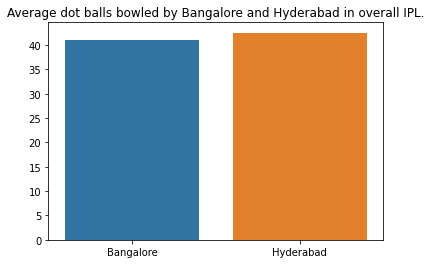

In [63]:
average_dot_balls_overall = pd.Series([avg_dot_balls_overall_Bangalore,avg_dot_balls_overall_Hyderabad],index = ['Bangalore','Hyderabad'])
sns.barplot(x=average_dot_balls_overall.index,y=average_dot_balls_overall)
plt.title('Average dot balls bowled by Bangalore and Hyderabad in overall IPL.')
plt.show()

**Hyderabad bowled more dot balls in an average than Bangaloe in a match in overall IPL.**